In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import yfinance as yf

from datetime import datetime, date, timedelta

In [2]:
def pull_stock_date(stocks_df, stock_tick, transaction_date):
    transaction_date = "2021-01-04"
    data = yf.download(stock_tick, start=transaction_date, end=today)
    data.reset_index(inplace=True)
    data.Date = data.Date.dt.strftime('%Y-%m-%d')
    # data.head()

    stocks_df = stocks_df.merge(data[['Date','Close']],
                                how = 'left',
                                left_on = 'DATE',
                                right_on = 'Date').drop(labels='Date',axis=1)
    stocks_df.rename(columns={"Close":stock_tick},copy=False,inplace=True)
    return stocks_df

In [3]:
scenario = (pd.read_csv('SF.csv')).iloc[:,:]
scenario = scenario.transpose()
new_header = scenario.iloc[0] #grab the first row for the header
scenario = scenario[1:] #take the data less the header row
scenario.columns = new_header #set the header row as the df header
# scenario

In [4]:
today = datetime.today().strftime('%Y-%m-%d')
dates = pd.date_range(start="2021-01-04", end=today, freq='D')
stocks_df = pd.DataFrame({'DATE': dates.strftime('%Y-%m-%d')})
# stocks_df.head()

for i in scenario.columns[1:]:
    stocks_df = pull_stock_date(stocks_df, i, "2021-01-01")

stocks_df = stocks_df.transpose()

new_header = stocks_df.iloc[0] #grab the first row for the header
stocks_df = stocks_df[1:] #take the data less the header row
stocks_df.columns = new_header #set the header row as the df header

stocks_df = stocks_df.sort_index().infer_objects()
# stocks_df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [5]:
# stocks_df.loc[:,'2021-01-04']
# stocks_df

In [6]:
portfolio = scenario.iloc[0,:]
mix = portfolio.iloc[1:].sort_index().astype('int')
values = (pd.DataFrame(stocks_df.to_numpy())*((mix.to_numpy()).reshape(mix.shape[0],1)))
values.columns = stocks_df.columns #set the header row as the df header
values.set_index(stocks_df.index, inplace=True)
values.dropna(axis=1, inplace=True)
performance = [values.sum()]

for i in list(range(1,scenario.shape[0])):

    portfolio = scenario.iloc[i,:]
    mix = portfolio.iloc[1:].sort_index().astype('int')
    values = (pd.DataFrame(stocks_df.to_numpy())*((mix.to_numpy()).reshape(mix.shape[0],1)))
    values.columns = stocks_df.columns #set the header row as the df header
    values.set_index(stocks_df.index, inplace=True)
    values.dropna(axis=1, inplace=True)
    performance = performance + [values.sum()]

# performance = performance / performance[0][0] * 100

performance = pd.DataFrame(performance)
performance.set_index(scenario.index, inplace=True)
performance.columns = values.columns
performance = performance.divide((performance.loc['Benchmark','2021-01-04'])/100) # Change field and data for new normalization
performance = performance.transpose().reset_index()
# performance

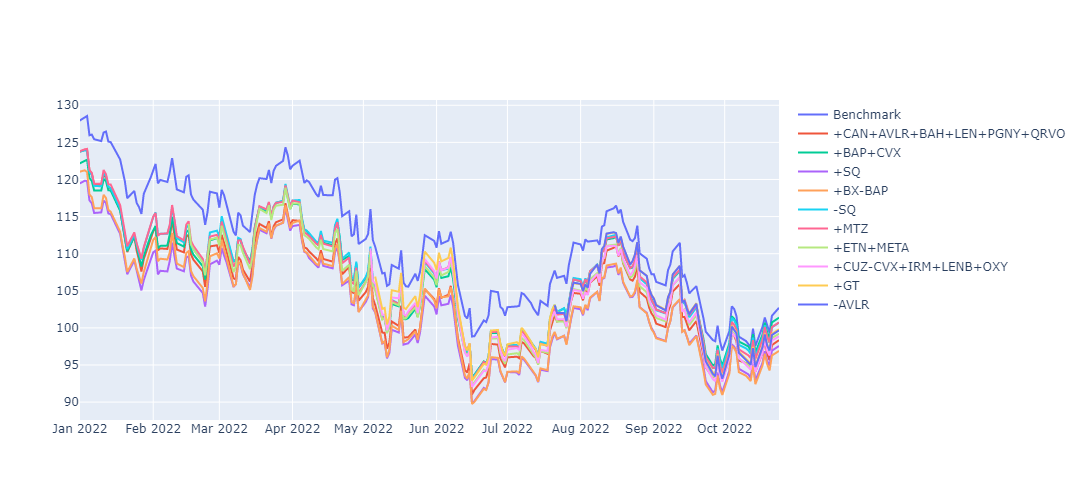

In [20]:
import plotly.graph_objects as go

fig = go.Figure()
for i in list(range(1,scenario.shape[0]+1)):
    date_val = str(scenario.iloc[i-1,0])
    index_val = performance[performance.DATE == date_val].index.to_list()[0]
    fig.add_trace(go.Scatter(x=performance.DATE[index_val:], y=performance.iloc[index_val:,i],
                        mode='lines',
                        name=scenario.index[i-1]))
# fig.update_yaxes(rangemode="tozero")
fig.update_layout(height = 500)
fig.update_xaxes(range=['2022-01-01','2022-10-24'])
fig.show()